In [70]:
import numpy as np
import pandas as pd

%precision 2
pd.set_option("display.precision", 3)

In [71]:
df = pd.read_csv("../data/ch2_scores_em.csv", index_col = "student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


ch2_scores_em.csv -> 50명의 수학 시험 점수와 영어 시험 점수를 담은 파일

In [72]:
en_scores = np.array(df["english"])[:10]
ma_scores = np.array(df["mathematics"])[:10]

index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student')
scores_df = pd.DataFrame({"english" : en_scores, "mathematics":ma_scores}, index = index)

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


# 3.1 두 데이터 사이의 관계를 나타내는 지표  
- 양의 상관관계
- 음의 상관관계
- 무상관<br>

상관을 수치에 대한 지표로 표현하기
## 3.1.1 np.cov : 공분산

In [73]:
summary_df = scores_df.copy()
summary_df["english_deviation"] = summary_df["english"] - summary_df["english"].mean()
summary_df["mathematics_deviation"] = summary_df["mathematics"] - summary_df["mathematics"].mean()
summary_df["product of deviations"] = summary_df["english_deviation"] * summary_df["mathematics_deviation"]
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [74]:
summary_df["product of deviations"].mean() 

62.80

수학 점수와 영어점수는 양의 상관관계에 있다고 할 수 있음 

In [75]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

## 3.1.2 상관계수

In [76]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1]/(np.std(en_scores)*np.std(ma_scores))

0.82

## 3.2.1 산점도

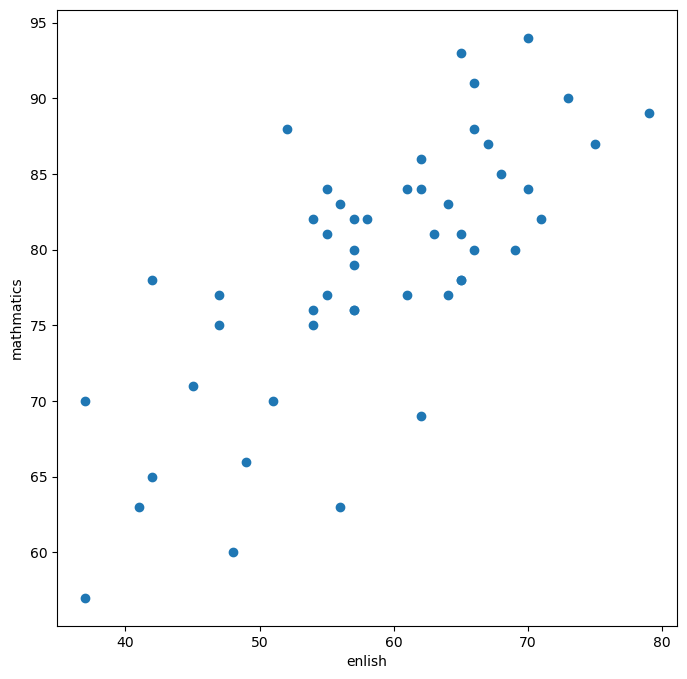

In [77]:
import matplotlib.pyplot as plt

%matplotlib inline

en_scores = np.array(df["english"])
ma_scores = np.array(df["mathematics"])

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

#산점도
ax.scatter(en_scores, ma_scores)
ax.set_xlabel("enlish")
ax.set_ylabel("mathmatics")

plt.show()

## 3.2.2 회귀직선

In [78]:
poly_fit = np.polyfit(en_scores, ma_scores, 1) # 계수 구하기

In [89]:
# from numpy.polynomial import Polynomial
fx = Polynomial.fit(en_scores, ma_scores, 1)
fx

Polynomial([78.64, 13.05], domain=[37., 79.], window=[-1.,  1.], symbol='x')

In [80]:
fx(0) # 헤에에ㅔ 스고이 

42.60

In [81]:
poly_1d = np.poly1d(poly_fit) # b0 + b1x를 반환하는 함수를 작성

In [82]:
poly_fit # n차 계수 ... 0차 계수 

array([ 0.62, 42.6 ])

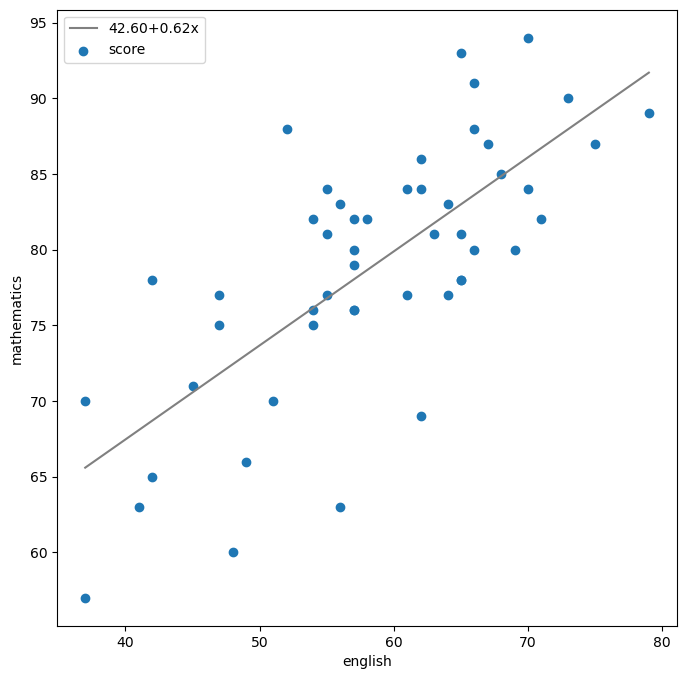

In [83]:
xs = np.linspace(en_scores.min(), en_scores.max())
ys = poly_1d(xs)


# 그래프 그리기 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color="gray", label=f"{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x")
ax.scatter(en_scores, ma_scores, label="score")

# 설명
ax.set_xlabel("english")
ax.set_ylabel("mathematics")

# 범례 표시
ax.legend(loc="upper left")

plt.show()

In [84]:
poly_1d(0)

42.60

## 3.2.3 히트맵

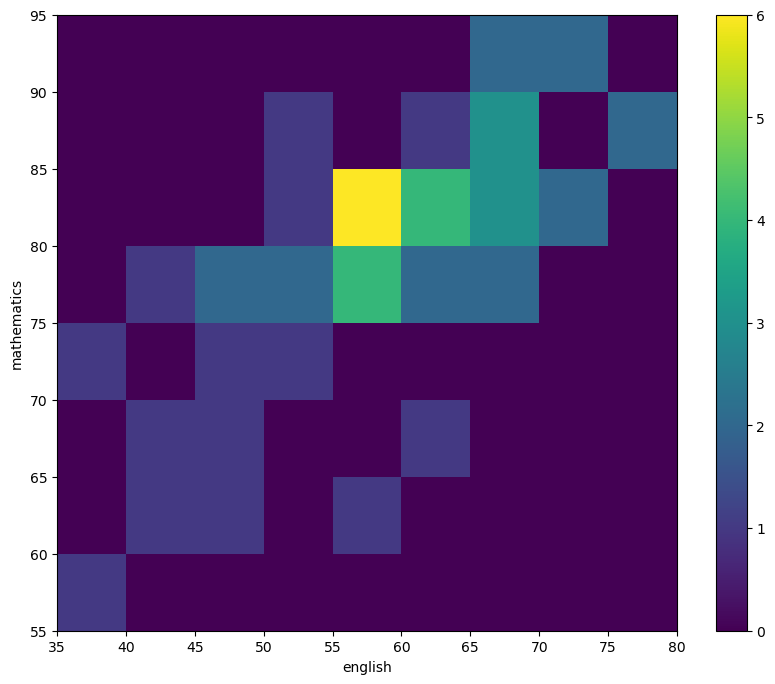

In [85]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(en_scores, ma_scores, bins=[9, 8], range=[(35, 80), (55, 95)])

# 설명
ax.set_xlabel("english")
ax.set_ylabel("mathematics")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

# 4.1 모집단과 표본

In [92]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

54.55

In [93]:
scores.mean()

55.00

In [118]:
np.random.seed(0)
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f"{i+1}번째 무작위 추출로 얻은 표본 평균", sample.mean())

1번째 무작위 추출로 얻은 표본 평균 54.55
2번째 무작위 추출로 얻은 표본 평균 50.7
3번째 무작위 추출로 얻은 표본 평균 53.7
4번째 무작위 추출로 얻은 표본 평균 55.1
5번째 무작위 추출로 얻은 표본 평균 52.5


In [114]:
np.random.rand(10)

array([0.98, 0.8 , 0.46, 0.78, 0.12, 0.64, 0.14, 0.94, 0.52, 0.41])

In [ ]:
이윤서 !!! 죽을래?? 까불지마 우씨!!! 농담이야 